In [21]:
# 添加input目录
import sys
sys.path.append('../input')   

In [20]:
from tensorflow.keras.layers import (Input, Dense,Activation, BatchNormalization, Conv1D, Conv2D,MaxPooling1D, MaxPooling2D, LSTM, GRU, Embedding, Bidirectional,
                         Concatenate,Dropout, Embedding,Convolution1D, Flatten,Layer)
from tensorflow.keras.regularizers import l1, l2, l1_l2
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from tensorflow.keras.models import Sequential, Model
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import initializers
from tensorflow.keras.layers import Layer, InputSpec
from tensorflow.keras import backend as K
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
# Performance:
from sklearn.metrics import (confusion_matrix, classification_report, matthews_corrcoef, precision_score)
from sklearn.model_selection import (StratifiedKFold, KFold, train_test_split)
# import pydot_ng as pydot
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical as labelEncoding   # Usages: Y = labelEncoding(Y, dtype=int)
from tensorflow.keras.utils import plot_model,model_to_dot  

from sklearn.metrics import (confusion_matrix, classification_report, matthews_corrcoef, precision_score, roc_curve, auc)
from sklearn.model_selection import (StratifiedKFold, KFold, train_test_split)
from clqmodel.layers import MultiHeadAttention,Attention,AttLayer
from scipy import interp
#from ePooling import GlobalExpectationPooling1D
from tcn.tcn import TCN
import numpy as np
my_seed = 42
np.random.seed(my_seed)
import random 
random.seed(my_seed)
import tensorflow as tf
tf.random.set_seed(my_seed)

In [22]:
##定义损失函数图像
def lossPlot(results):
    plt.title(label='Loss: Training and Validation')
    plt.plot(results.history['loss'], label='Training Loss')
    plt.plot(results.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
#end-def
##定义accuracy图像
def accuracyPlot(results):
    plt.title(label='Accuracy: Training and Validation')
    plt.plot(results.history['accuracy'], label='Training Accuracy')
    plt.plot(results.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
 ##定义roc指标图像   
def rocPlot(TPR, meanFPR):
    plt.plot([0,1], [0,1],linestyle = '--',lw = 2,color = 'black')
    meanTPR = np.mean(TPR, axis=0)
    meanAUC = auc(meanFPR, meanTPR)
    plt.plot(meanFPR, meanTPR, color='blue',
            label=r'Mean ROC (AUC = %0.4f )' % (meanAUC),lw=2, alpha=1)

    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic Curve (ROC Curve)')
    plt.legend(loc="lower right")
    plt.savefig('ROC-240.png')
    plt.show()

In [23]:
def ourmodel():
    in_put = Input(shape = (152,1))
    a = Convolution1D(128,3,activation='relu',padding='valid')(in_put)
    a = BatchNormalization()(a)
#     a = MaxPooling1D(pool_size=3, strides=1,padding='valid')(a)
    b = Convolution1D(128,3,activation='relu',padding='valid')(a)
    b = BatchNormalization()(b)
    c = Convolution1D(256,3,activation='relu',padding='valid')(b)
    #c = MaxPooling1D(pool_size=3, strides=1,padding='valid')(c)
    c = Dropout(0.7)(c)
    c = Reshape((256,146),name='c')(c)
#     d = Bidirectional(LSTM(128,return_sequences=True))(c)
    d = TCN(nb_filters=128, kernel_size=5, dropout_rate=0.1, nb_stacks=1,  dilations=[1, 2, 4,8], return_sequences=True,activation='relu',padding='same',use_skip_connections=True)(c)
#     d = TCN(nb_filters=256, kernel_size=5, dropout_rate=0.3, nb_stacks=1,  dilations=[1, 2, 4,8], return_sequences=True,activation='relu',padding='same',use_skip_connections=True)(c)
    #d = MultiHeadAttention(head_num=32, activation='relu', use_bias=True, 
    #                        return_multi_attention=False, name='Multi-Head-Attention')(d)
#     d = (GlobalExpectationPooling1D(mode = 0, m_trainable = False, m_value = 1))(d)

    d = Flatten()(d)
#     e = Dropout(0.5)(d)
    e = Dense(128, activation='relu', name='FC3')(d)
    e = Dropout(rate=0.2)(e)
    e = Dense(64, activation='relu', name='FC2')(e)
    
    e = Dense(32, activation='relu', name='FC4')(e)
    
    output = Dense(2, activation='softmax', name='Output')(e)

    return Model(inputs = [in_put],outputs = [output])

In [24]:
model = ourmodel()
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 152, 1)]          0         
                                                                 
 conv1d_15 (Conv1D)          (None, 150, 128)          512       
                                                                 
 batch_normalization_10 (Bat  (None, 150, 128)         512       
 chNormalization)                                                
                                                                 
 conv1d_16 (Conv1D)          (None, 148, 128)          49280     
                                                                 
 batch_normalization_11 (Bat  (None, 148, 128)         512       
 chNormalization)                                                
                                                                 
 conv1d_17 (Conv1D)          (None, 146, 256)          9856

In [25]:
#data1 = np.load('/kaggle/input/dataset/fin.npz')
X1 = pd.read_csv('/kaggle/input/3combinefea/ALL.csv',header=None).to_numpy()
y_1 = pd.read_csv('/kaggle/input/3combinefea/y_ALL.csv',header=None).to_numpy()
y1 = labelEncoding(y_1, dtype=int)

In [26]:
X1=X1.reshape(9925,152,1)

Epoch 1/600
31/32 [============================>.] - ETA: 0s - loss: 2.8512 - accuracy: 0.5198
Epoch 1: val_accuracy improved from -inf to 0.55164, saving model to my_model2/our_model_TCN_test/firstModel1.tf
32/32 [==============================] - 11s 133ms/step - loss: 2.8499 - accuracy: 0.5200 - val_loss: 0.6924 - val_accuracy: 0.5516
Epoch 2/600
31/32 [============================>.] - ETA: 0s - loss: 0.7252 - accuracy: 0.5142
Epoch 2: val_accuracy did not improve from 0.55164
32/32 [==============================] - 3s 109ms/step - loss: 0.7251 - accuracy: 0.5142 - val_loss: 0.6916 - val_accuracy: 0.5355
Epoch 3/600
31/32 [============================>.] - ETA: 0s - loss: 0.6917 - accuracy: 0.5475
Epoch 3: val_accuracy did not improve from 0.55164
32/32 [==============================] - 4s 111ms/step - loss: 0.6918 - accuracy: 0.5472 - val_loss: 0.6917 - val_accuracy: 0.5355
Epoch 4/600
31/32 [============================>.] - ETA: 0s - loss: 0.6832 - accuracy: 0.5624
Epoch 4: va

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:86: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


AUC: 0.846288999128648
Accuracy: [0.7612090706825256]
Sensitivity:  [0.7787418655097614]
Specificity:  [0.7460018814675446]
MCC: [0.523423616044691]
Precision:  [0.7267206477732794]
Epoch 1/600
31/32 [============================>.] - ETA: 0s - loss: 3.2533 - accuracy: 0.5118
Epoch 1: val_accuracy improved from -inf to 0.54912, saving model to my_model2/our_model_TCN_test/firstModel2.tf
32/32 [==============================] - 10s 136ms/step - loss: 3.2522 - accuracy: 0.5118 - val_loss: 0.6929 - val_accuracy: 0.5491
Epoch 2/600
31/32 [============================>.] - ETA: 0s - loss: 0.7290 - accuracy: 0.5253
Epoch 2: val_accuracy did not improve from 0.54912
32/32 [==============================] - 4s 110ms/step - loss: 0.7289 - accuracy: 0.5254 - val_loss: 0.6927 - val_accuracy: 0.5441
Epoch 3/600
31/32 [============================>.] - ETA: 0s - loss: 0.6952 - accuracy: 0.5436
Epoch 3: val_accuracy did not improve from 0.54912
32/32 [==============================] - 3s 109ms/step 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:86: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


AUC: 0.8497615945245494
Accuracy: [0.7612090706825256, 0.7743073105812073]
Sensitivity:  [0.7787418655097614, 0.7232635060639471]
Specificity:  [0.7460018814675446, 0.8172541743970315]
MCC: [0.523423616044691, 0.5439076903033179]
Precision:  [0.7267206477732794, 0.7690504103165299]
Epoch 1/600
31/32 [============================>.] - ETA: 0s - loss: 2.7953 - accuracy: 0.5093
Epoch 1: val_accuracy improved from -inf to 0.59244, saving model to my_model2/our_model_TCN_test/firstModel3.tf
32/32 [==============================] - 10s 135ms/step - loss: 2.7941 - accuracy: 0.5094 - val_loss: 0.6927 - val_accuracy: 0.5924
Epoch 2/600
31/32 [============================>.] - ETA: 0s - loss: 0.7274 - accuracy: 0.5146
Epoch 2: val_accuracy did not improve from 0.59244
32/32 [==============================] - 3s 109ms/step - loss: 0.7274 - accuracy: 0.5145 - val_loss: 0.6915 - val_accuracy: 0.5617
Epoch 3/600
31/32 [============================>.] - ETA: 0s - loss: 0.6947 - accuracy: 0.5420
Epoch

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:86: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


AUC: 0.8281129838668109
Accuracy: [0.7612090706825256, 0.7743073105812073, 0.7551637291908264]
Sensitivity:  [0.7787418655097614, 0.7232635060639471, 0.7367816091954023]
Specificity:  [0.7460018814675446, 0.8172541743970315, 0.7695067264573991]
MCC: [0.523423616044691, 0.5439076903033179, 0.5047101531588652]
Precision:  [0.7267206477732794, 0.7690504103165299, 0.7138084632516704]
Epoch 1/600
31/32 [============================>.] - ETA: 0s - loss: 1.8983 - accuracy: 0.4991
Epoch 1: val_accuracy improved from -inf to 0.56877, saving model to my_model2/our_model_TCN_test/firstModel4.tf
32/32 [==============================] - 11s 135ms/step - loss: 1.8977 - accuracy: 0.4991 - val_loss: 0.6910 - val_accuracy: 0.5688
Epoch 2/600
31/32 [============================>.] - ETA: 0s - loss: 0.7117 - accuracy: 0.5304
Epoch 2: val_accuracy did not improve from 0.56877
32/32 [==============================] - 4s 111ms/step - loss: 0.7117 - accuracy: 0.5306 - val_loss: 0.6905 - val_accuracy: 0.5688


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:86: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


Epoch 1/600
31/32 [============================>.] - ETA: 0s - loss: 2.2806 - accuracy: 0.5121
Epoch 1: val_accuracy improved from -inf to 0.53350, saving model to my_model2/our_model_TCN_test/firstModel5.tf
32/32 [==============================] - 11s 133ms/step - loss: 2.2799 - accuracy: 0.5121 - val_loss: 0.6930 - val_accuracy: 0.5335
Epoch 2/600
31/32 [============================>.] - ETA: 0s - loss: 0.7151 - accuracy: 0.5348
Epoch 2: val_accuracy improved from 0.53350 to 0.55416, saving model to my_model2/our_model_TCN_test/firstModel5.tf
32/32 [==============================] - 4s 121ms/step - loss: 0.7151 - accuracy: 0.5348 - val_loss: 0.6922 - val_accuracy: 0.5542
Epoch 3/600
31/32 [============================>.] - ETA: 0s - loss: 0.6890 - accuracy: 0.5543
Epoch 3: val_accuracy improved from 0.55416 to 0.55516, saving model to my_model2/our_model_TCN_test/firstModel5.tf
32/32 [==============================] - 4s 120ms/step - loss: 0.6891 - accuracy: 0.5540 - val_loss: 0.6919

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:86: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


AUC: 0.8290549563430919
Accuracy: [0.7612090706825256, 0.7743073105812073, 0.7551637291908264, 0.7627204060554504, 0.7491183876991272]
Sensitivity:  [0.7787418655097614, 0.7232635060639471, 0.7367816091954023, 0.6927570093457944, 0.727683615819209]
Specificity:  [0.7460018814675446, 0.8172541743970315, 0.7695067264573991, 0.8157661647475642, 0.7663636363636364]
MCC: [0.523423616044691, 0.5439076903033179, 0.5047101531588652, 0.513336911298861, 0.4932412951988603]
Precision:  [0.7267206477732794, 0.7690504103165299, 0.7138084632516704, 0.7403245942571786, 0.7147613762486127]


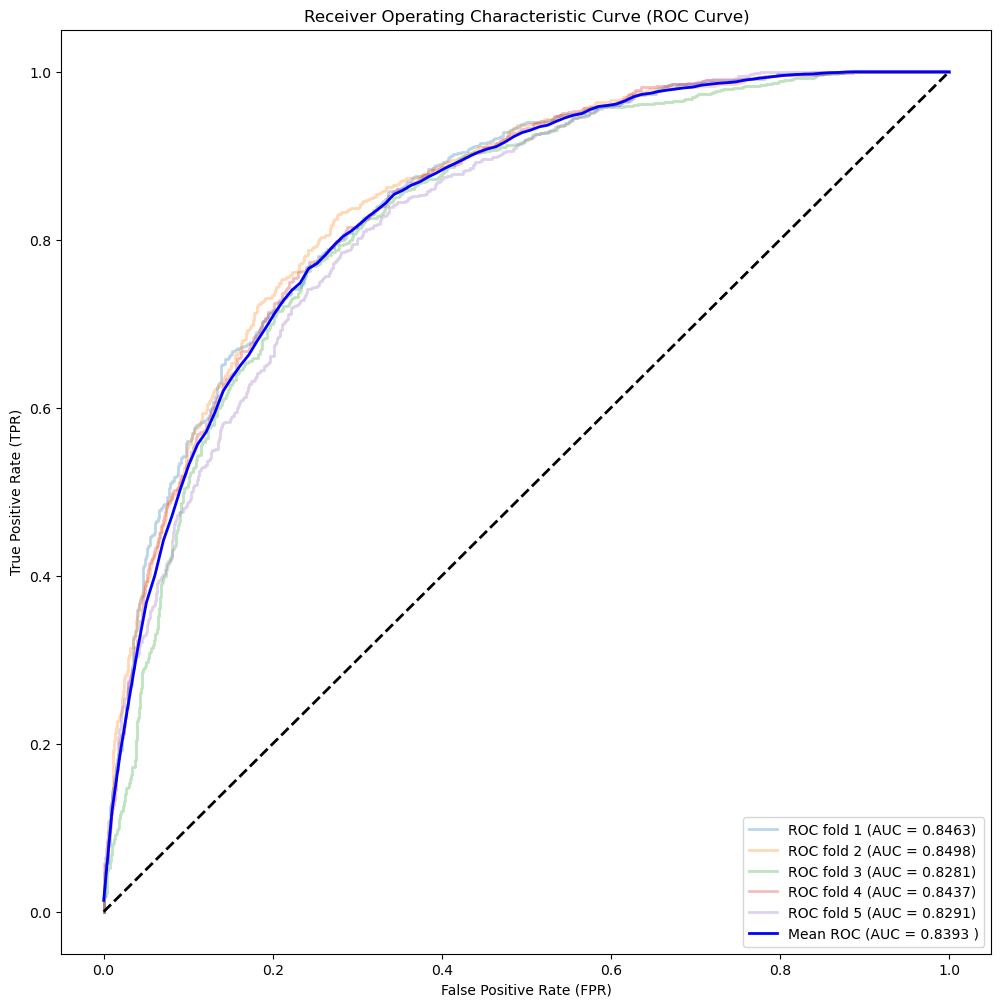

Accuracy [Each Fold]: [0.7612090706825256, 0.7743073105812073, 0.7551637291908264, 0.7627204060554504, 0.7491183876991272]
Accuracy: 0.7605
Sensitivity: 0.7318
Specificity: 0.7830
MCC: 0.5157
Precision: 0.7329


In [28]:
if __name__ == '__main__':
    config = tf.compat.v1.ConfigProto()

    config.gpu_options.allow_growth = True

    session = tf.compat.v1.Session(config=config)

    setEpochNumber     = 600 # Performed-welled in epoch 600.50
    setBatchSizeNumber = 256#26，32
    ####################################################

    cv = KFold(n_splits=5, shuffle=True, random_state=42)

    Accuracy = []
    Sensitivity = []
    Specificity = []
    Precision = []
    MCC = []

    # ROC Curve:
    fig1 = plt.figure(figsize=[12,12])

    TPR = []
    meanFPR = np.linspace(0, 1, 100)

    i = 1

    names = ['first']
    name=names[0]
    nn = 1
    
    for train, test in cv.split(y1):

        # Compile Model:
        model = ourmodel()
        model.compile(optimizer=Adam(learning_rate=0.0003),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

        
        filepath = 'my_model2/our_model_TCN_test/%sModel%d.tf' % (name,nn)
        
#         filepath = 'my_model/our_model_7_test/%sModel%d.h5' % (name,nn)
        
        checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=True, mode='max')
        callbacks_list = [checkpoint]
        back = EarlyStopping(monitor='val_accuracy', patience=20, verbose=1, mode='auto')
        # Run Model:
        results = model.fit(x=[X1[train,:]],
                            y=y1[train,:],
                            validation_data=([X1[test,:]],y1[test,:]),
                            batch_size=setBatchSizeNumber, epochs=setEpochNumber,
                            verbose=1,
                            callbacks=[callbacks_list, back])
        model.save('my_model2/our_model_TCN_test/%sModel%d.h5' % (name,nn))


        nn += 1
        accuracy = model.evaluate(x=[X1[test,:]],y=y1[test,:] )
        Accuracy.append(accuracy[1])

        # Performance Metices:
        Yactual = y_1[test,:]
        Yp = model.predict([X1[test,:]])
        v = Yp
        Yp = Yp.argmax(axis=1)

        CM = confusion_matrix(y_pred=Yp, y_true=Yactual)
        TN, FP, FN, TP = CM.ravel()

        MCC.append(matthews_corrcoef(y_true=Yactual, y_pred=Yp))
        Sensitivity.append( TP / (TP + FN) )
        Specificity.append( TN / (TN + FP) )
        Precision.append(precision_score(y_true=Yactual, y_pred=Yp))

        # ROC Curve
        fpr, tpr, _ = roc_curve(Yactual, v[:,1])
        TPR.append(interp(meanFPR, fpr, tpr))
        rocauc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.4f)' % (i, rocauc))
        i= i+1

        # Performance Plot
#         print('#################################################')
#         print('Fold\'s Accuracy: {:.2f}'.format(accuracy[1]*100.0))
#         lossPlot(results)
#         accuracyPlot(results)
#         print('#################################################')

        print('AUC:',rocauc)
        print('Accuracy:',Accuracy)
        print('Sensitivity: ',Sensitivity)
        print('Specificity: ',Specificity)
        print('MCC:',MCC)
        print('Precision: ',Precision)
        
        

    #end-for

    rocPlot(TPR, meanFPR)

    print('Accuracy [Each Fold]: {}'.format(Accuracy))
    print('Accuracy: {:.4f}'.format(np.sum(Accuracy)/5.0))
    print('Sensitivity: {0:.4f}'.format(np.sum(Sensitivity)/5.00))
    print('Specificity: {0:.4f}'.format(np.sum(Specificity)/5.00))
    print('MCC: {0:.4f}'.format(np.sum(MCC)/5.00))
    print('Precision: {0:.4f}'.format(np.sum(Precision)/5.00))